1.Gradient Boosting Regression is an ensemble learning technique used for regression tasks. It builds a model in a stage-wise fashion, starting with a simple model and iteratively improving it by adding additional models that correct the errors of the combined ensemble so far. Each new model is trained to minimize the gradient of the loss function with respect to the current ensemble model's predictions, effectively optimizing the model to reduce errors.

Mean Squared Error: 0.1609479383401024
R-squared: 0.9954395761586995


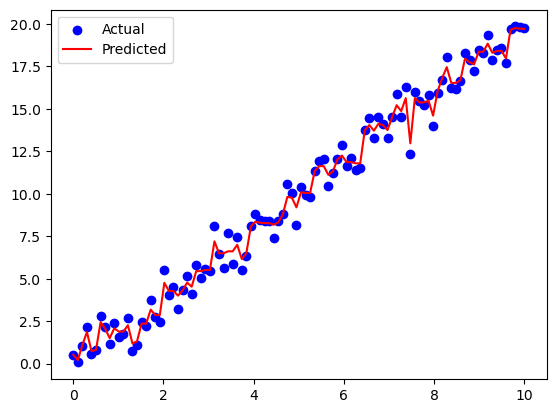

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + np.random.normal(0, 1, 100)

# Gradient Boosting Regressor from scratch
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.model_weights = []

    def fit(self, X, y):
        # Initialize model
        self.models = []
        self.model_weights = []
        
        # Initial prediction is the mean of y
        y_pred = np.full(y.shape, np.mean(y))
        for _ in range(self.n_estimators):
            # Compute residuals
            residuals = y - y_pred
            
            # Fit a simple regression tree to the residuals
            model = self._fit_tree(X, residuals)
            self.models.append(model)
            
            # Predict the residuals
            pred = self._predict_tree(model, X)
            
            # Update predictions with learning rate
            y_pred += self.learning_rate * pred
            
    def predict(self, X):
        y_pred = np.full(X.shape, np.mean(y))
        for model in self.models:
            y_pred += self.learning_rate * self._predict_tree(model, X)
        return y_pred
    
    def _fit_tree(self, X, y):
        from sklearn.tree import DecisionTreeRegressor
        tree = DecisionTreeRegressor(max_depth=self.max_depth)
        tree.fit(X.reshape(-1, 1), y)
        return tree
    
    def _predict_tree(self, model, X):
        return model.predict(X.reshape(-1, 1))

# Initialize and train the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X, y)

# Predictions
y_pred = gbr.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.legend()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters to try
learning_rates = [0.01, 0.1, 0.2]
n_estimators_list = [50, 100, 200]
max_depths = [2, 3, 4]

best_params = {}
best_mse = float('inf')

# Grid search
for lr in learning_rates:
    for n_estimators in n_estimators_list:
        for max_depth in max_depths:
            gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=lr, max_depth=max_depth)
            gbr.fit(X_train, y_train)
            y_pred = gbr.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_params = {'learning_rate': lr, 'n_estimators': n_estimators, 'max_depth': max_depth}

print(f'Best Parameters: {best_params}')
print(f'Best Mean Squared Error: {best_mse}')


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 2}
Best Mean Squared Error: 0.8371446348750504


4.A weak learner in Gradient Boosting is a simple model that performs slightly better than random guessing. Typically, decision stumps (shallow decision trees with only one split) or other simple models are used as weak learners. The goal is to sequentially add these weak learners to form a strong model.

5.The intuition behind Gradient Boosting is to build a model incrementally by adding weak learners that correct the errors made by the existing ensemble. Each weak learner is trained to predict the residuals (errors) of the combined ensemble of all previous learners. This process iteratively reduces the overall error, leading to a strong predictive model.

6.Gradient Boosting builds an ensemble of weak learners through the following steps:

Initialization: Start with an initial model (e.g., mean of the target variable).
Compute Residuals: Calculate the residuals (differences between actual and predicted values) of the current ensemble.
Train Weak Learner: Fit a weak learner to the residuals.
Update Model: Add the weak learner to the ensemble, updating the predictions by a learning rate times the weak learner's predictions.
Iterate: Repeat steps 2-4 for a predefined number of iterations or until the error is minimized